In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import acquire
import prepare

In [3]:
df_iris = sns.load_dataset('iris')
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [74]:
df_iris.shape

(150, 5)

In [75]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [76]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [77]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [79]:
df_google.shape

(891, 12)

In [80]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [6]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [11]:
df_excel = pd.read_excel('train.xlsx')
df_excel.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
df_excel_sample = df_excel.head(100)

In [13]:
df_excel_sample.shape

(100, 12)

In [14]:
df_excel.shape

(891, 12)

In [15]:
df_excel.shape[0]

891

In [16]:
df_excel.shape[1]

12

In [18]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [89]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [90]:
list(df_excel.select_dtypes(['object']).columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [20]:
df_excel.select_dtypes(include = 'object').columns.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [91]:
df2 = df_excel[df_excel.select_dtypes(['float64']).columns]
df2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000
888,889.0,0.0,3.0,NaN,1.0,2.0,23.4500
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [21]:
titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [22]:
titanic_stats['range'] = titanic_stats['max']-titanic_stats['min']
titanic_stats

,count,mean,std,min,25%,50%,75%,max,range
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


In [2]:
df = acquire.new_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [3]:
df = acquire.new_iris_data()
df

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


In [4]:
df = acquire.new_telco_data()
df

,customer_id,internet_service_type_id,internet_service_type,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,payment_type_id,monthly_charges,total_charges,contract_type_id,paperless_billing
0,0002-ORFBO,1,DSL,Female,0,Yes,Yes,9,Yes,No,...,Yes,2,65.60,593.3,No,2,65.60,593.3,2,Yes
1,0003-MKNFE,1,DSL,Male,0,No,No,9,Yes,Yes,...,No,2,59.90,542.4,No,2,59.90,542.4,1,No
2,0004-TLHLJ,2,Fiber optic,Male,0,No,No,4,Yes,No,...,Yes,1,73.90,280.85,Yes,1,73.90,280.85,1,Yes
3,0011-IGKFF,2,Fiber optic,Male,1,Yes,No,13,Yes,No,...,Yes,1,98.00,1237.85,Yes,1,98.00,1237.85,1,Yes
4,0013-EXCHZ,2,Fiber optic,Female,1,Yes,No,3,Yes,No,...,Yes,2,83.90,267.4,Yes,2,83.90,267.4,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,2,Fiber optic,Female,0,No,No,1,Yes,Yes,...,Yes,1,85.00,85,Yes,1,85.00,85,1,Yes
7039,9462-MJUAW,1,DSL,Male,0,No,No,4,Yes,Yes,...,No,2,50.40,206.6,Yes,2,50.40,206.6,1,No
7040,9705-ZJBCG,1,DSL,Female,0,Yes,Yes,13,Yes,No,...,No,3,54.15,701.05,No,3,54.15,701.05,2,No
7041,9777-IQHWP,2,Fiber optic,Male,0,Yes,Yes,64,Yes,Yes,...,No,3,93.40,5822.3,No,3,93.40,5822.3,3,No


In [2]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [2]:
df = acquire.get_iris_data()
df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,3,virginica,6.7,3.0,5.2,2.3
146,3,virginica,6.3,2.5,5.0,1.9
147,3,virginica,6.5,3.0,5.2,2.0
148,3,virginica,6.2,3.4,5.4,2.3


In [4]:
df = acquire.get_telco_data()
df.head(5)

,customer_id,internet_service_type_id,internet_service_type,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,payment_type_id,monthly_charges,total_charges,contract_type_id,paperless_billing
0,0002-ORFBO,1,DSL,Female,0,Yes,Yes,9,Yes,No,...,Yes,2,65.6,593.3,No,2,65.6,593.3,2,Yes
1,0003-MKNFE,1,DSL,Male,0,No,No,9,Yes,Yes,...,No,2,59.9,542.4,No,2,59.9,542.4,1,No
2,0004-TLHLJ,2,Fiber optic,Male,0,No,No,4,Yes,No,...,Yes,1,73.9,280.85,Yes,1,73.9,280.85,1,Yes
3,0011-IGKFF,2,Fiber optic,Male,1,Yes,No,13,Yes,No,...,Yes,1,98.0,1237.85,Yes,1,98.0,1237.85,1,Yes
4,0013-EXCHZ,2,Fiber optic,Female,1,Yes,No,3,Yes,No,...,Yes,2,83.9,267.4,Yes,2,83.9,267.4,1,Yes


# Data Preparation

In [8]:
df = acquire.get_iris_data()
df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,3,virginica,6.7,3.0,5.2,2.3
146,3,virginica,6.3,2.5,5.0,1.9
147,3,virginica,6.5,3.0,5.2,2.0
148,3,virginica,6.2,3.4,5.4,2.3


In [4]:
df = df.drop(columns = 'species_id')
df

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


In [5]:
df = df.rename(columns= {'species_name':'species'})
df

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


In [6]:
dummy_df = pd.get_dummies(df['species'])
dummy_df

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [7]:
df=pd.concat([df,dummy_df],axis = 1)
df

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3,0,0,1
146,virginica,6.3,2.5,5.0,1.9,0,0,1
147,virginica,6.5,3.0,5.2,2.0,0,0,1
148,virginica,6.2,3.4,5.4,2.3,0,0,1


In [9]:
df = prepare.prep_iris(df)
df

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3,0,0,1
146,virginica,6.3,2.5,5.0,1.9,0,0,1
147,virginica,6.5,3.0,5.2,2.0,0,0,1
148,virginica,6.2,3.4,5.4,2.3,0,0,1


In [15]:
df = acquire.get_titanic_data()
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [16]:
df = prepare.prep_titanic(df)

In [17]:
df

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,1,0,71.2833,0,0,0,0
2,2,1,3,0,0,7.9250,1,0,0,1
3,3,1,1,1,0,53.1000,0,0,0,1
4,4,0,3,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,0,0,13.0000,1,1,0,1
887,887,1,1,0,0,30.0000,1,0,0,1
888,888,0,3,1,2,23.4500,0,0,0,1
889,889,1,1,0,0,30.0000,1,1,0,0


In [24]:
df = acquire.get_telco_data()
df

,customer_id,internet_service_type_id,internet_service_type,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,payment_type_id.1,monthly_charges.1,total_charges.1,contract_type_id.1,paperless_billing.1
0,0002-ORFBO,1,DSL,Female,0,Yes,Yes,9,Yes,No,...,Yes,2,65.60,593.3,No,2,65.60,593.3,2,Yes
1,0003-MKNFE,1,DSL,Male,0,No,No,9,Yes,Yes,...,No,2,59.90,542.4,No,2,59.90,542.4,1,No
2,0004-TLHLJ,2,Fiber optic,Male,0,No,No,4,Yes,No,...,Yes,1,73.90,280.85,Yes,1,73.90,280.85,1,Yes
3,0011-IGKFF,2,Fiber optic,Male,1,Yes,No,13,Yes,No,...,Yes,1,98.00,1237.85,Yes,1,98.00,1237.85,1,Yes
4,0013-EXCHZ,2,Fiber optic,Female,1,Yes,No,3,Yes,No,...,Yes,2,83.90,267.4,Yes,2,83.90,267.4,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,2,Fiber optic,Female,0,No,No,1,Yes,Yes,...,Yes,1,85.00,85,Yes,1,85.00,85,1,Yes
7039,9462-MJUAW,1,DSL,Male,0,No,No,4,Yes,Yes,...,No,2,50.40,206.6,Yes,2,50.40,206.6,1,No
7040,9705-ZJBCG,1,DSL,Female,0,Yes,Yes,13,Yes,No,...,No,3,54.15,701.05,No,3,54.15,701.05,2,No
7041,9777-IQHWP,2,Fiber optic,Male,0,Yes,Yes,64,Yes,Yes,...,No,3,93.40,5822.3,No,3,93.40,5822.3,3,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   internet_service_type_id  7043 non-null   int64  
 2   internet_service_type     7043 non-null   object 
 3   gender                    7043 non-null   object 
 4   senior_citizen            7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   tenure                    7043 non-null   int64  
 8   phone_service             7043 non-null   object 
 9   multiple_lines            7043 non-null   object 
 10  online_security           7043 non-null   object 
 11  online_backup             7043 non-null   object 
 12  device_protection         7043 non-null   object 
 13  tech_support              7043 non-null   object 
 14  streamin

In [7]:
df.duplicated().sum()

0

In [8]:
df.internet_service_type_id.value_counts()

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

In [13]:
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [25]:
df = prepare.prep_telco(df)
df

,customer_id,internet_service_type,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,DSL,Female,0,Yes,Yes,9,Yes,No,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,DSL,Male,0,No,No,9,Yes,Yes,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Fiber optic,Male,0,No,No,4,Yes,No,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Fiber optic,Male,1,Yes,No,13,Yes,No,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Fiber optic,Female,1,Yes,No,3,Yes,No,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,Fiber optic,Female,0,No,No,1,Yes,Yes,No,...,No,No,No,Yes,1,Yes,1,85.00,85,Yes
7039,9462-MJUAW,DSL,Male,0,No,No,4,Yes,Yes,No,...,No,No,No,No,1,No,2,50.40,206.6,Yes
7040,9705-ZJBCG,DSL,Female,0,Yes,Yes,13,Yes,No,Yes,...,No,Yes,No,No,2,No,3,54.15,701.05,No
7041,9777-IQHWP,Fiber optic,Male,0,Yes,Yes,64,Yes,Yes,Yes,...,Yes,No,No,Yes,3,No,3,93.40,5822.3,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   internet_service_type  7043 non-null   object 
 2   gender                 7043 non-null   object 
 3   senior_citizen         7043 non-null   int64  
 4   partner                7043 non-null   object 
 5   dependents             7043 non-null   object 
 6   tenure                 7043 non-null   int64  
 7   phone_service          7043 non-null   object 
 8   multiple_lines         7043 non-null   object 
 9   online_security        7043 non-null   object 
 10  online_backup          7043 non-null   object 
 11  device_protection      7043 non-null   object 
 12  tech_support           7043 non-null   object 
 13  streaming_tv           7043 non-null   object 
 14  streaming_movies       7043 non-null   object 
 15  cont

Split your data
- Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.
- Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.
- Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.
- Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [10]:
train, validate, test = prepare.split_iris_data(df)

In [11]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
70,versicolor,5.9,3.2,4.8,1.8,0,1,0
123,virginica,6.3,2.7,4.9,1.8,0,0,1
87,versicolor,6.3,2.3,4.4,1.3,0,1,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
15,setosa,5.7,4.4,1.5,0.4,1,0,0


In [12]:
train.shape

(90, 8)

In [13]:
validate.shape

(30, 8)

In [14]:
test.shape

(30, 8)

In [18]:
train, validate, test = prepare.split_titanic_data(df)

In [19]:
train.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1
55,55,1,1,0,0,35.5000,1,1,0,1
243,243,0,3,0,0,7.1250,1,1,0,1


In [20]:
train.shape

(534, 10)

In [21]:
validate.shape

(178, 10)

In [22]:
test.shape

(179, 10)

In [26]:
train, validate, test = prepare.split_telco_data(df)

In [27]:
train.head()

,customer_id,internet_service_type,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
5897,9847-HNVGP,None,Male,0,No,No,17,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,2,19.95,310.6,No
2438,7570-WELNY,Fiber optic,Female,0,Yes,No,68,Yes,Yes,Yes,...,No,No,No,No,3,Yes,3,84.70,5711.05,No
5960,2568-OIADY,Fiber optic,Female,0,Yes,No,37,Yes,Yes,No,...,Yes,No,Yes,Yes,1,Yes,1,99.50,3762,Yes
6051,9351-LZYGF,DSL,Female,0,Yes,No,42,Yes,Yes,Yes,...,No,Yes,No,No,1,Yes,4,66.40,2727.8,No
785,1142-IHLOO,Fiber optic,Female,0,No,No,51,Yes,No,No,...,No,No,Yes,Yes,2,No,4,87.55,4475.9,No


In [28]:
train.shape

(4225, 21)

In [29]:
validate.shape

(1409, 21)

In [30]:
test.shape

(1409, 21)

# Explore Exercises

In [3]:
iris = acquire.get_iris_data()
iris

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,3,virginica,6.7,3.0,5.2,2.3
146,3,virginica,6.3,2.5,5.0,1.9
147,3,virginica,6.5,3.0,5.2,2.0
148,3,virginica,6.2,3.4,5.4,2.3


In [4]:
iris = prepare.prep_iris(iris)
iris

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3,0,0,1
146,virginica,6.3,2.5,5.0,1.9,0,0,1
147,virginica,6.5,3.0,5.2,2.0,0,0,1
148,virginica,6.2,3.4,5.4,2.3,0,0,1


In [5]:
train, validate, test = prepare.my_train_test_split(iris, target = 'species')

In [6]:
train.shape, validate.shape, test.shape

((90, 8), (30, 8), (30, 8))

In [7]:
iris_quan = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_cat = ['versicolor', 'virginica','setosa']

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 70 to 97
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       90 non-null     object 
 1   sepal_length  90 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
 5   setosa        90 non-null     uint8  
 6   versicolor    90 non-null     uint8  
 7   virginica     90 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 4.5+ KB


In [9]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.875556,3.070000,3.782222,1.203333,0.333333,0.333333,0.333333
std,0.792282,0.436135,1.742114,0.755422,0.474045,0.474045,0.474045
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.225000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.375000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


sepal_length


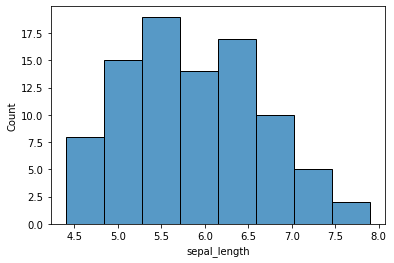

sepal_width


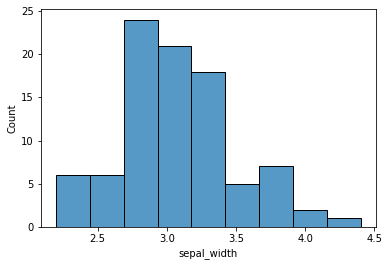

petal_length


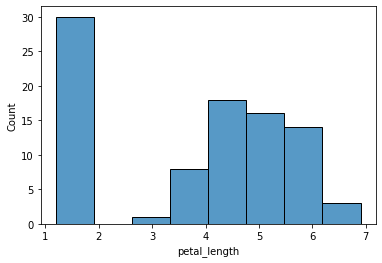

petal_width


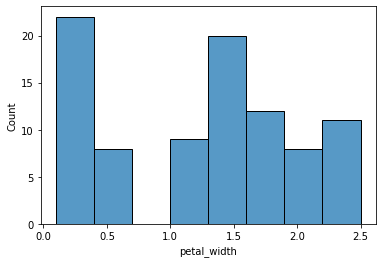

In [10]:
for col in iris_quan:
    print(col)
    sns.histplot(data = train, x= col)
    plt.show()

sepal_length


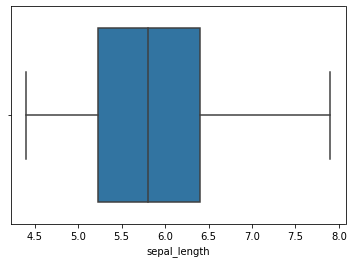

sepal_width


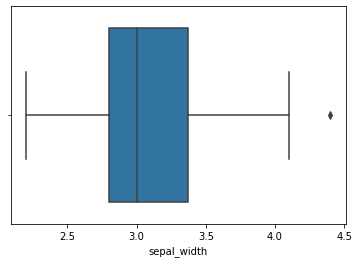

petal_length


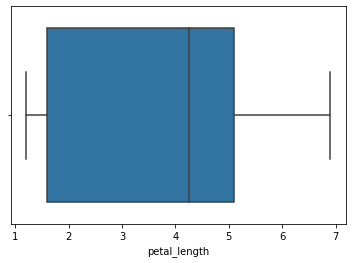

petal_width


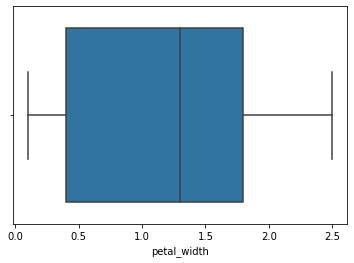

In [11]:
for col in iris_quan:
    print(col)
    sns.boxplot(data = train, x= col)
    plt.show()

In [12]:
for col in iris_cat:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)

versicolor
0    60
1    30
Name: versicolor, dtype: int64
0    66.666667
1    33.333333
Name: versicolor, dtype: float64
virginica
0    60
1    30
Name: virginica, dtype: int64
0    66.666667
1    33.333333
Name: virginica, dtype: float64
setosa
0    60
1    30
Name: setosa, dtype: int64
0    66.666667
1    33.333333
Name: setosa, dtype: float64


### Documented Takeaways

    While conducting univariate exploration I was able to get a broader picture of what a lot of the variables looked like by themselves, for example each type of iris was equally represented in the amount of collected data they contained.
    There may be some outliers in petal length and width but it would require a deeper look into sample groups of data and how petal measurements look when grouped to certain species of iris.

In [13]:
def quan_vis(train, col):
    plt.title('Relationship of species and '+col)
    sns.barplot(x='species', y=col, data=train)
    meas_avg = train[col].mean()
    plt.axhline(meas_avg, label='measurement avg')
    plt.legend()
    plt.show()
    
    
def quan_test(train, col):
    alpha = 0.05
    null_hyp = col+' and species are independent'
    alt_hyp = 'There is a relationship between species and '+col
    observed = pd.crosstab(train.species, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between species and '+col)

def quan_analysis(train, col):
    quan_vis(train, col)
    quan_test(train, col)

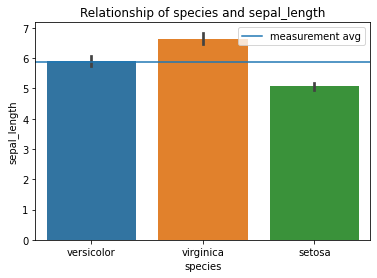

We reject the null hypothesis that sepal_length and species are independent
There is a relationship between species and sepal_length


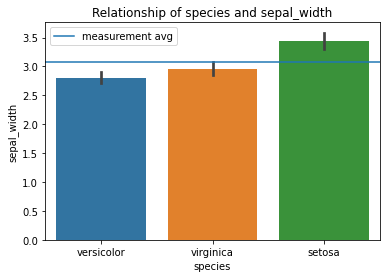

We reject the null hypothesis that sepal_width and species are independent
There is a relationship between species and sepal_width


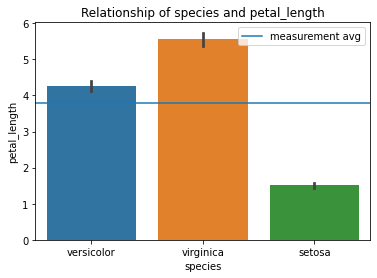

We reject the null hypothesis that petal_length and species are independent
There is a relationship between species and petal_length


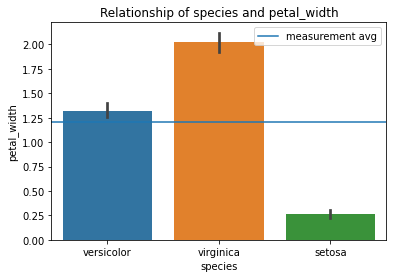

We reject the null hypothesis that petal_width and species are independent
There is a relationship between species and petal_width


In [14]:
for col in iris_quan:
    quan_analysis(train, col)

In [15]:
train.species.describe(include='number')

count             90
unique             3
top       versicolor
freq              30
Name: species, dtype: object

In [16]:
alpha = 0.05
null_hyp = 'versicolor and petal width are independent'
alt_hyp = 'there is a relationship between versicolor and petal width'
stat_train, p_train = stats.mannwhitneyu(train.petal_width.mean(), train.versicolor)

if p_train < alpha:
    print('reject null hyp that', null_hyp)
    print('there appears to be a relationship between versicolor and petal width')
else:
    print('fail to reject the null hypothesis that', null_hyp)

reject null hyp that versicolor and petal width are independent
there appears to be a relationship between versicolor and petal width


In [17]:
alpha = 0.05
null_hyp = 'versicolor and petal width are independent'
alt_hyp = 'there is a relationship between versicolor and petal width'
stat_train, p_train = stats.mannwhitneyu(train.petal_width.mean(), train.virginica)

if p_train < alpha:
    print('reject null hyp that', null_hyp)
    print('there appears to be a relationship between versicolor and petal width')
else:
    print('fail to reject the null hypothesis that', null_hyp)

reject null hyp that versicolor and petal width are independent
there appears to be a relationship between versicolor and petal width


### Documented Takeaways
    
    After conducting bivariate exploration, I was able to show the greater relationship between petal and sepal measurements and that of specific species of iris.
    Depending on the species of iris the greater and lesser the size of the specific iris, falling into specific groupings that were consistent.

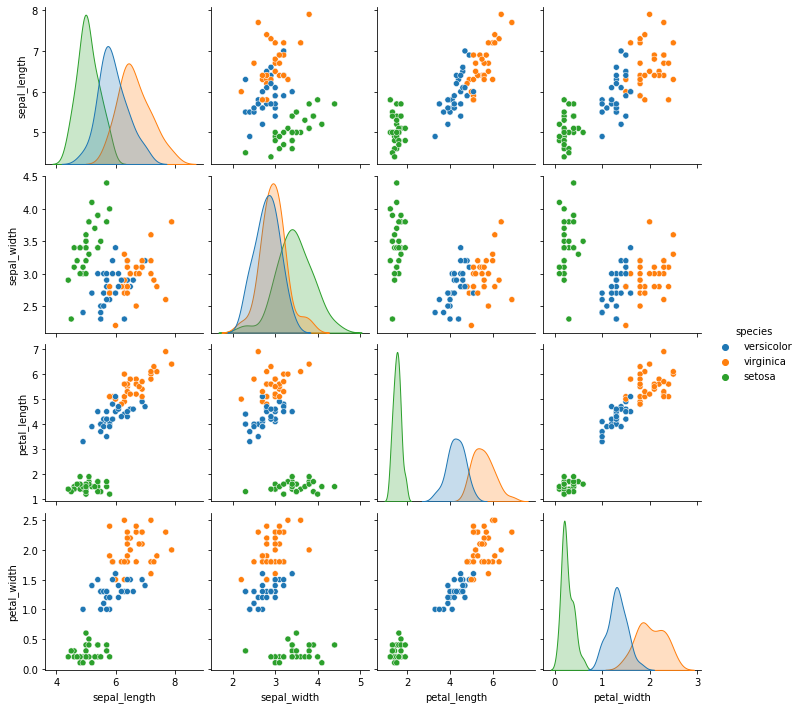

In [19]:
sns.pairplot(data = train, vars= iris_quan, hue='species')

In [20]:
print(iris_quan)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


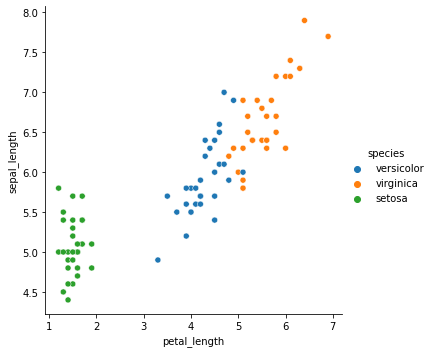

In [21]:
sns.relplot(data = train, x = 'petal_length', y = 'sepal_length', hue='species')

In [22]:
# Is the sepal area significantly different in virginica compared to setosa?
train_area = train

train_area['sepal_area'] = train.sepal_length * train.sepal_width
train_area

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_area
70,versicolor,5.9,3.2,4.8,1.8,0,1,0,18.88
123,virginica,6.3,2.7,4.9,1.8,0,0,1,17.01
87,versicolor,6.3,2.3,4.4,1.3,0,1,0,14.49
3,setosa,4.6,3.1,1.5,0.2,1,0,0,14.26
15,setosa,5.7,4.4,1.5,0.4,1,0,0,25.08
...,...,...,...,...,...,...,...,...,...
11,setosa,4.8,3.4,1.6,0.2,1,0,0,16.32
29,setosa,4.7,3.2,1.6,0.2,1,0,0,15.04
96,versicolor,5.7,2.9,4.2,1.3,0,1,0,16.53
44,setosa,5.1,3.8,1.9,0.4,1,0,0,19.38


In [23]:
observed = pd.crosstab(train_area.sepal_area, train_area.species)
observed

species,setosa,versicolor,virginica
sepal_area,,,
10.35,1,0,0
11.76,0,1,0
12.65,0,1,0
12.76,1,0,0
13.20,0,1,0
...,...,...,...
23.04,0,0,1
23.20,1,0,0
25.08,1,0,0


In [24]:
alpha = 0.05
null_hyp = 'sepal area of each species of iris are independent'
alt_hyp = 'there is a relationship between the sepal area of each species of iris'
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(p)

if p_train < alpha:
    print('reject null hyp that', null_hyp)
    print('there appears to be a relationship between the sepal area of each species of iris')
else:
    print('fail to reject the null hypothesis that', null_hyp)

0.1593031708318354
reject null hyp that sepal area of each species of iris are independent
there appears to be a relationship between the sepal area of each species of iris


### Documented Takeaways

    After conducting multivariate exploration I was able to see a deeper relationship between the measurements and their respective species.  Not only do the petal measurements and the sepal measurements have a strong relationship with their categorical species but they also have a similar relationship with each other (i.e. Sepal and petal length).

In [25]:
titanic = acquire.get_titanic_data()
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [26]:
titanic = prepare.prep_titanic(titanic)
titanic

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,0,1,0,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,1,0,1,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,1,0,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,1,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,0,1,0,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,1,0,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,1,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,0,1,1,0,0


In [27]:
titanic.describe()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,0.523008,0.381594,32.204208,0.602694,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429,0.489615,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,445.000000,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,667.500000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,890.000000,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   sex                      891 non-null    object 
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embark_town              889 non-null    object 
 8   alone                    891 non-null    int64  
 9   sex_female               891 non-null    uint8  
 10  sex_male                 891 non-null    uint8  
 11  embark_town_Cherbourg    891 non-null    uint8  
 12  embark_town_Queenstown   891 non-null    uint8  
 13  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(6), o

In [29]:
t_cat = titanic.select_dtypes(include='object').columns
t_cat

Index(['sex', 'embark_town'], dtype='object')

In [30]:
t_var = titanic.select_dtypes(exclude='object').columns
t_var

Index(['passenger_id', 'survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone',
       'sex_female', 'sex_male', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [31]:
train, validate, test = prepare.my_train_test_split(titanic, 'survived')

In [32]:
train.shape, validate.shape, test.shape

((534, 14), (178, 14), (179, 14))

sex


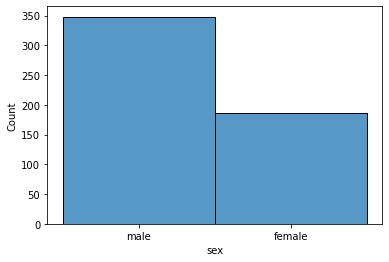

embark_town


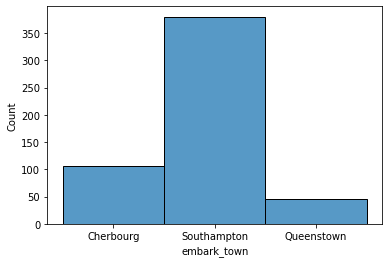

In [33]:
for col in t_cat:
    print(col)
    sns.histplot(data = train, x=col)
    plt.show()

passenger_id


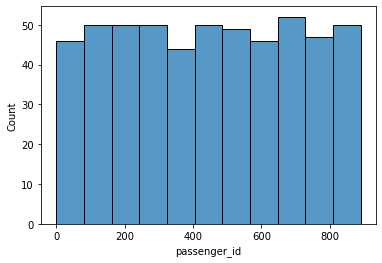

survived


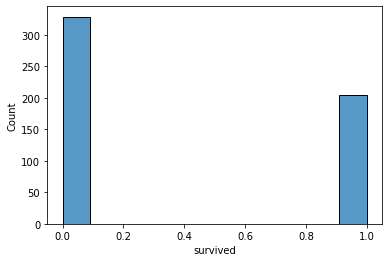

pclass


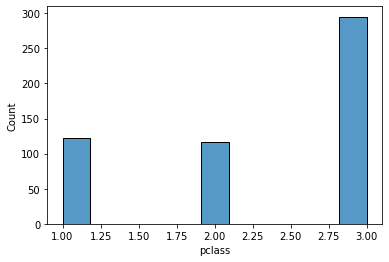

sibsp


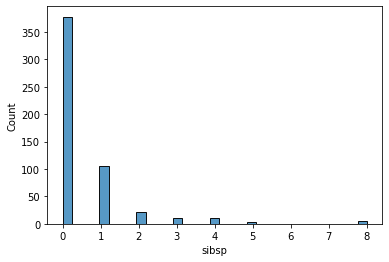

parch


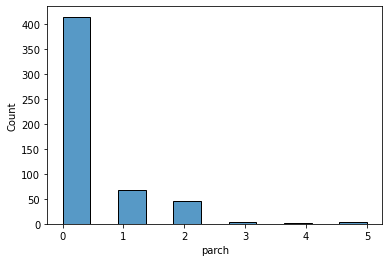

fare


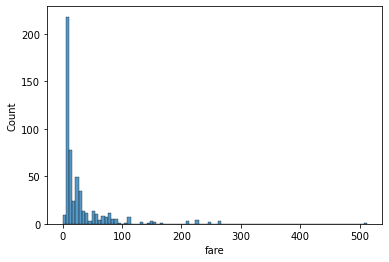

alone


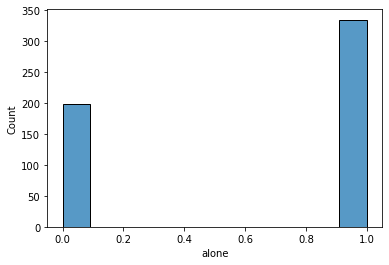

sex_female


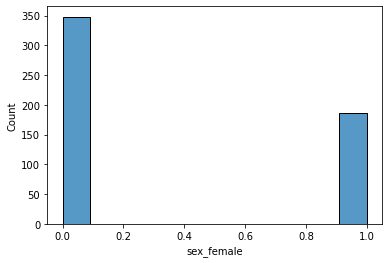

sex_male


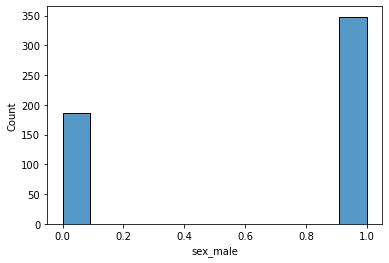

embark_town_Cherbourg


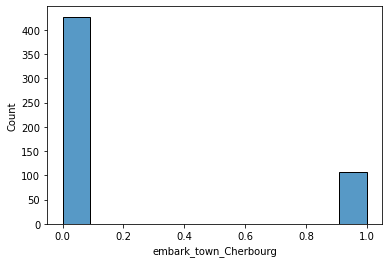

embark_town_Queenstown


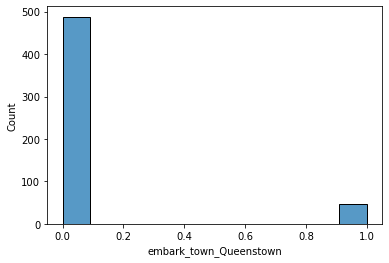

embark_town_Southampton


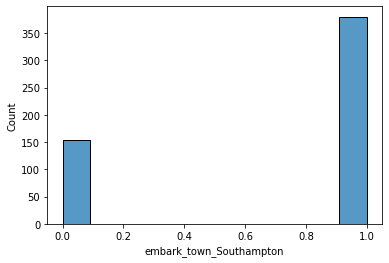

In [34]:
for col in t_var:
    print(col)
    sns.histplot(data = train, x=col)
    plt.show()

sex


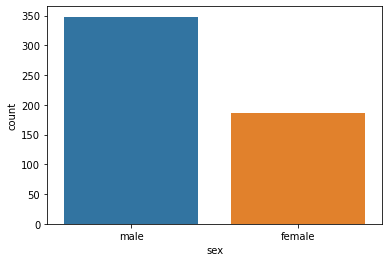

embark_town


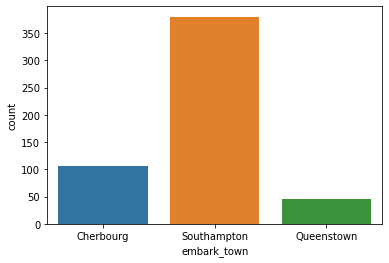

In [35]:
for col in t_cat:
    print(col)
    sns.countplot(data = train, x=col)
    plt.show()

In [36]:
for col in t_cat:
    print(col)
    print()
    print(train[col].value_counts())
    print()
    print(train[col].value_counts(normalize=True)*100)
    print()

sex

male      348
female    186
Name: sex, dtype: int64

male      65.168539
female    34.831461
Name: sex, dtype: float64

embark_town

Southampton    380
Cherbourg      107
Queenstown      46
Name: embark_town, dtype: int64

Southampton    71.294559
Cherbourg      20.075047
Queenstown      8.630394
Name: embark_town, dtype: float64



In [50]:
def titanic_vis(train, col):
    plt.title('Relationship of survival rate and '+col)
    sns.barplot(x=col, y='survived', data=train)
    survival_rate = train.survived.mean()
    plt.axhline(survival_rate, label='survival rate')
    plt.legend()
    plt.show()
    
    
def titanic_test(train, col):
    alpha = 0.05
    null_hyp = col+' and survival rate are independent'
    alt_hyp = 'There is a relationship between survival rate and '+col
    observed = pd.crosstab(train.survived, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between survival rate and '+col)

def titanic_analysis(train, col):
    titanic_vis(train, col)
    titanic_test(train, col)

In [37]:
alpha = .05
null_hyp = 'survival and being alone are independent'
alt_hyp = 'there is a relationship between survival and being alone'

observed = pd.crosstab(train.survived, train.alone)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(p)

if p_train < alpha:
    print('reject null hyp that', null_hyp)
    print('there appears to be a relationship between survival and being alone')
else:
    print('fail to reject the null hypothesis that', null_hyp)

3.8366042996023025e-06
reject null hyp that survival and being alone are independent
there appears to be a relationship between survival and being alone


In [45]:
observed

alone,0,1
survived,,
0,97,232
1,102,103


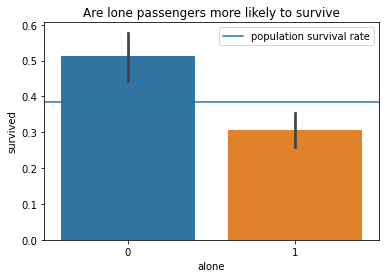

In [46]:
plt.title("Are lone passengers more likely to survive")
sns.barplot(x='alone', y='survived', data=train)
pop_survival_rate = train.survived.mean()
plt.axhline(pop_survival_rate, label='population survival rate')
plt.legend()
plt.show()

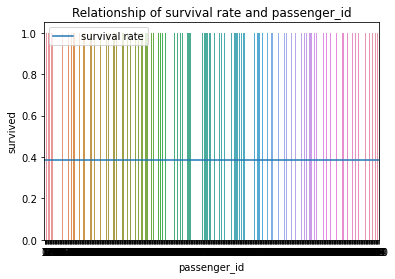

We fail to reject the null hypothesis that passenger_id and survival rate are independent
There appears to be no relationship between survival rate and passenger_id


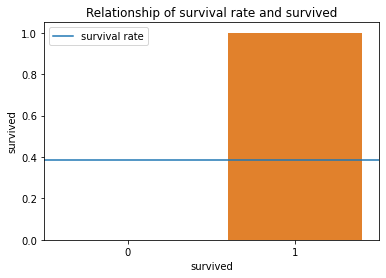

We reject the null hypothesis that survived and survival rate are independent
There is a relationship between survival rate and survived


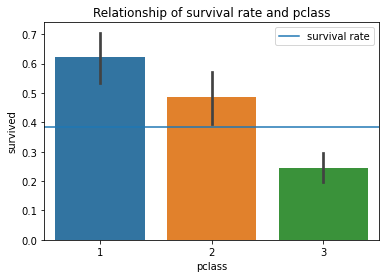

We reject the null hypothesis that pclass and survival rate are independent
There is a relationship between survival rate and pclass


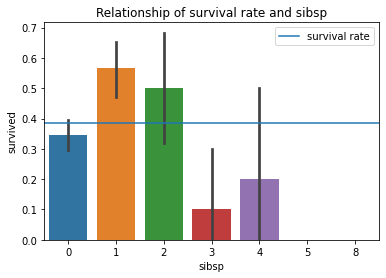

We reject the null hypothesis that sibsp and survival rate are independent
There is a relationship between survival rate and sibsp


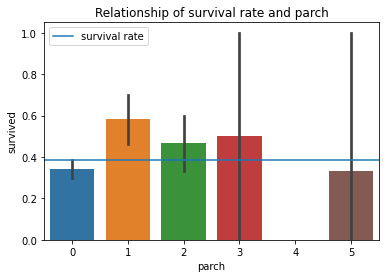

We reject the null hypothesis that parch and survival rate are independent
There is a relationship between survival rate and parch


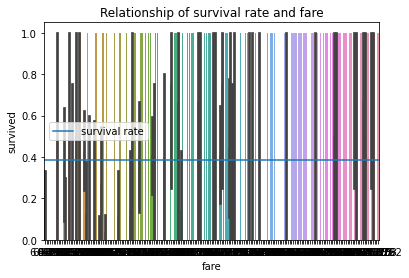

We reject the null hypothesis that fare and survival rate are independent
There is a relationship between survival rate and fare


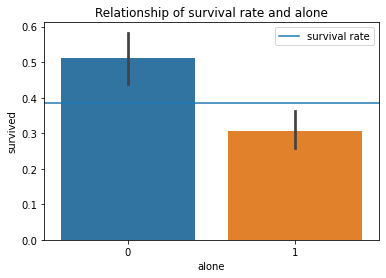

We reject the null hypothesis that alone and survival rate are independent
There is a relationship between survival rate and alone


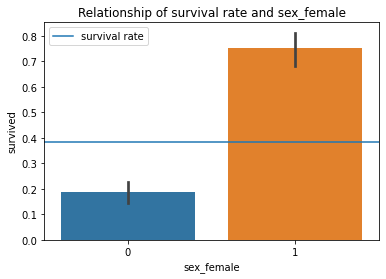

We reject the null hypothesis that sex_female and survival rate are independent
There is a relationship between survival rate and sex_female


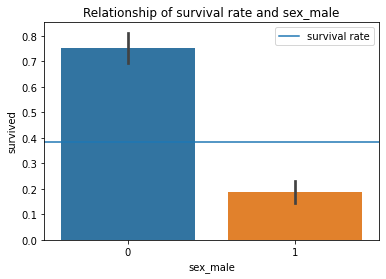

We reject the null hypothesis that sex_male and survival rate are independent
There is a relationship between survival rate and sex_male


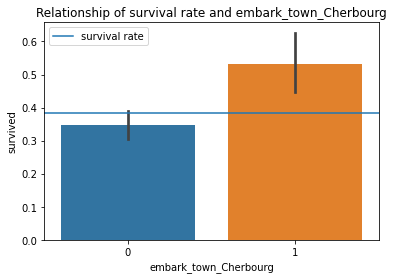

We reject the null hypothesis that embark_town_Cherbourg and survival rate are independent
There is a relationship between survival rate and embark_town_Cherbourg


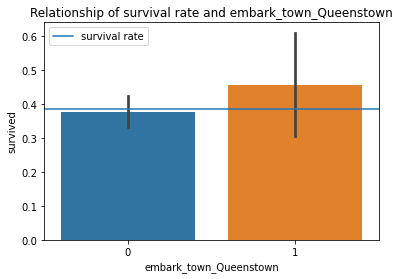

We fail to reject the null hypothesis that embark_town_Queenstown and survival rate are independent
There appears to be no relationship between survival rate and embark_town_Queenstown


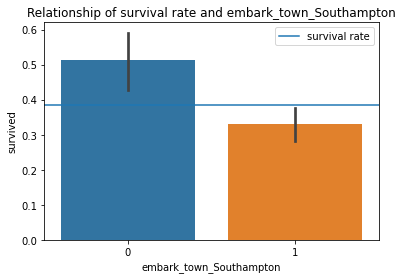

We reject the null hypothesis that embark_town_Southampton and survival rate are independent
There is a relationship between survival rate and embark_town_Southampton


In [51]:
for col in t_var:
    titanic_analysis(train, col)

### Univariate and Bivariate Exploration Findings

    After conducting tests and creating visuals of the different numeric and categorical/discrete variables I have found that many of the different tracked variables influence whether someone would have survived or not on the titanic.  There was only one variable (embark_town_Queenstown) that didn't seem to have a strong relationship with the survival rate and can possibly be discared as useful data.

In [2]:
telco = acquire.get_telco_data()
telco

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [3]:
telco = prepare.prep_telco(telco)
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,0,0,0,0,0,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,1,0,1,0,0,0,0,1


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [51]:
telco.describe(include='all')

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0002-ORFBO,Male,NaN,No,No,NaN,Yes,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3498,3088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.439585,0.216669,0.216101,0.335794,0.228880
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.496372,0.412004,0.411613,0.472301,0.420141
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [6]:
train, validate, test = prepare.my_train_test_split(telco, 'tenure')

In [7]:
train.shape, validate.shape, test.shape

((4225, 42), (1409, 42), (1409, 42))

In [11]:
tel_bool = train.select_dtypes('uint8').columns
tel_bool

Index(['multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

In [19]:
tel_vars = train.select_dtypes(include=('float64', 'int64')).columns
tel_vars

Index(['senior_citizen', 'tenure', 'monthly_charges'], dtype='object')

senior_citizen
0    3536
1     689
Name: senior_citizen, dtype: int64
0    83.692308
1    16.307692
Name: senior_citizen, dtype: float64


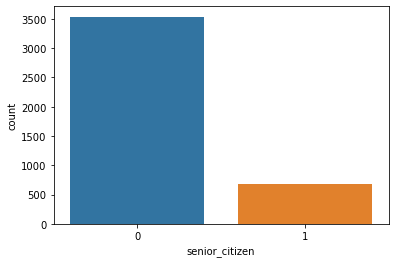

tenure
1     367
72    217
2     142
3     120
4     106
     ... 
38     35
39     34
44     31
36     30
0       7
Name: tenure, Length: 73, dtype: int64
1     8.686391
72    5.136095
2     3.360947
3     2.840237
4     2.508876
        ...   
38    0.828402
39    0.804734
44    0.733728
36    0.710059
0     0.165680
Name: tenure, Length: 73, dtype: float64


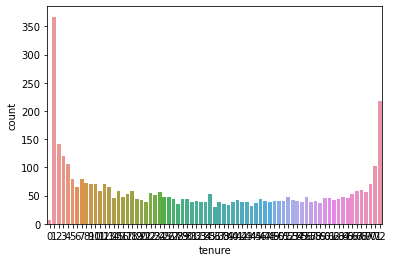

monthly_charges
20.05    31
19.70    28
19.90    28
19.65    28
19.85    27
         ..
87.45     1
63.85     1
30.05     1
22.95     1
96.95     1
Name: monthly_charges, Length: 1366, dtype: int64
20.05    0.733728
19.70    0.662722
19.90    0.662722
19.65    0.662722
19.85    0.639053
           ...   
87.45    0.023669
63.85    0.023669
30.05    0.023669
22.95    0.023669
96.95    0.023669
Name: monthly_charges, Length: 1366, dtype: float64


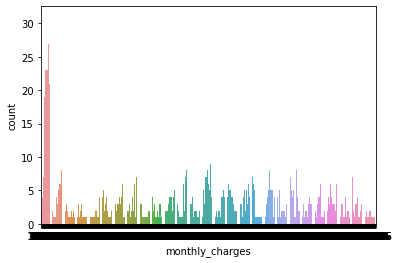

In [20]:
for col in tel_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

### Univariate Exploration
There are a large range of different monthly charges and levels of tenure.  Approx 84% of the customer base is NOT senior citizens so the service provided trends with a younger audience.

In [25]:
train.tenure.value_counts(bins=10,sort=False)

(-0.073, 7.2]    966
(7.2, 14.4]      454
(14.4, 21.6]     342
(21.6, 28.8]     334
(28.8, 36.0]     327
(36.0, 43.2]     266
(43.2, 50.4]     272
(50.4, 57.6]     297
(57.6, 64.8]     303
(64.8, 72.0]     664
Name: tenure, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

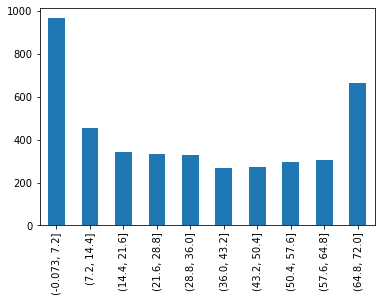

In [26]:
train.tenure.value_counts(bins=10,sort=False).plot.bar()
plt.show

In [27]:
train.monthly_charges.value_counts(bins=10,sort=False)

(18.148999999999997, 28.3]    966
(28.3, 38.35]                 103
(38.35, 48.4]                 213
(48.4, 58.45]                 374
(58.45, 68.5]                 284
(68.5, 78.55]                 551
(78.55, 88.6]                 601
(88.6, 98.65]                 515
(98.65, 108.7]                435
(108.7, 118.75]               183
Name: monthly_charges, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

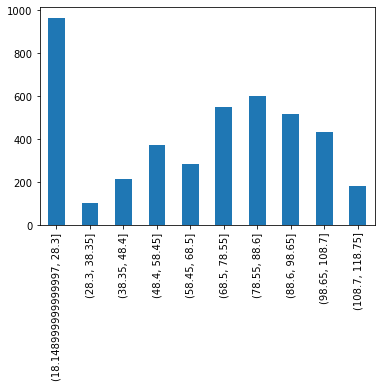

In [28]:
train.monthly_charges.value_counts(bins=10,sort=False).plot.bar()
plt.show

In [32]:
pd.cut(train.monthly_charges,bins=10)

3337     (68.5, 78.55]
130      (48.4, 58.45]
2799     (78.55, 88.6]
4091    (98.65, 108.7]
6544     (88.6, 98.65]
             ...      
5175     (88.6, 98.65]
137      (28.3, 38.35]
1899     (88.6, 98.65]
1432     (48.4, 58.45]
3197     (68.5, 78.55]
Name: monthly_charges, Length: 4225, dtype: category
Categories (10, interval[float64, right]): [(18.15, 28.3] < (28.3, 38.35] < (38.35, 48.4] < (48.4, 58.45] ... (78.55, 88.6] < (88.6, 98.65] < (98.65, 108.7] < (108.7, 118.75]]

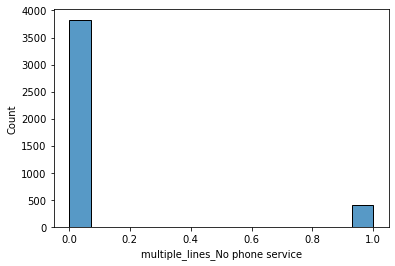

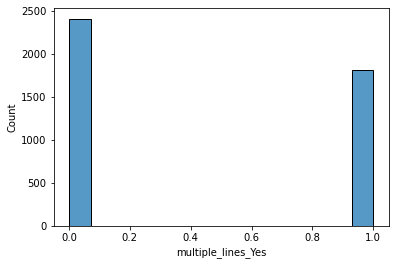

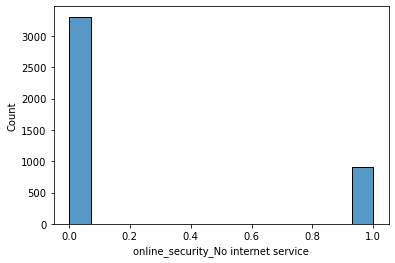

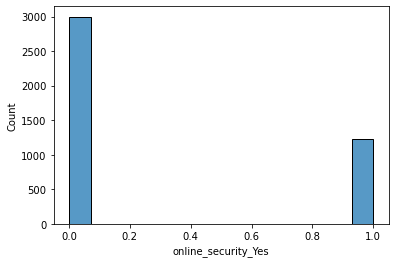

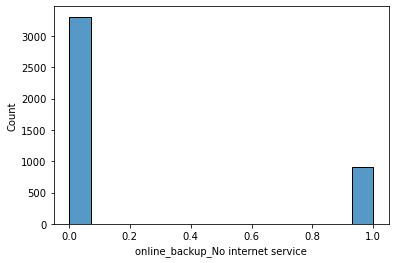

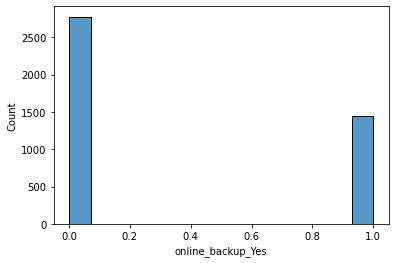

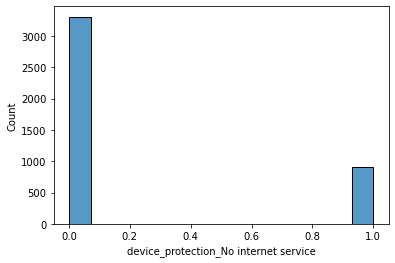

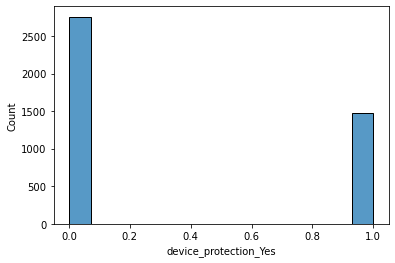

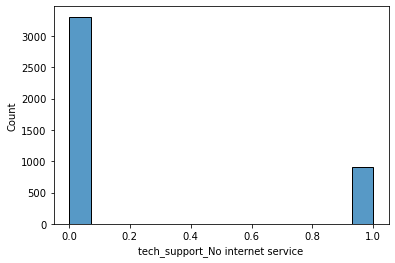

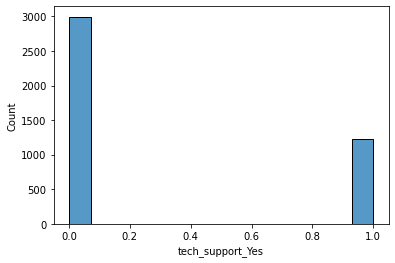

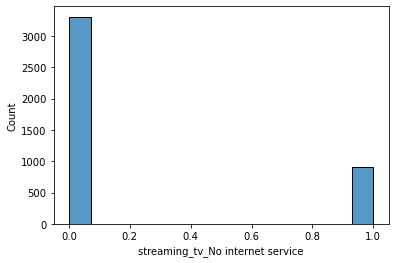

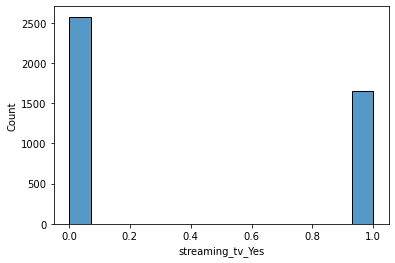

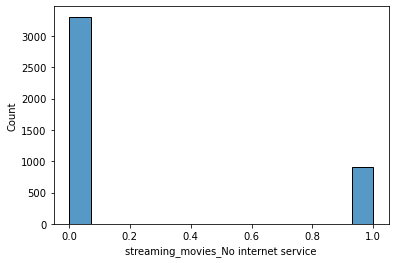

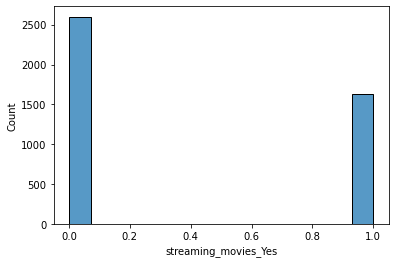

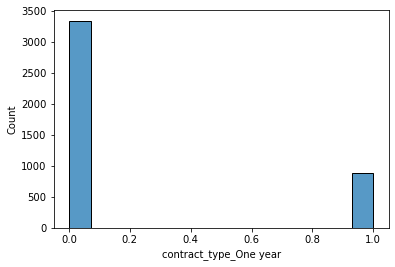

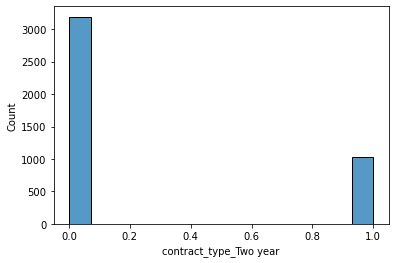

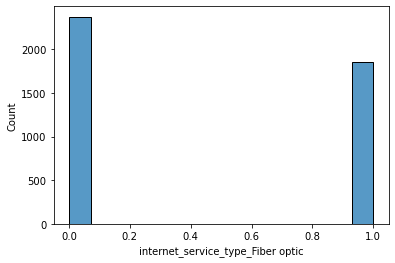

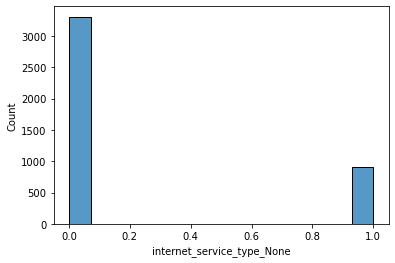

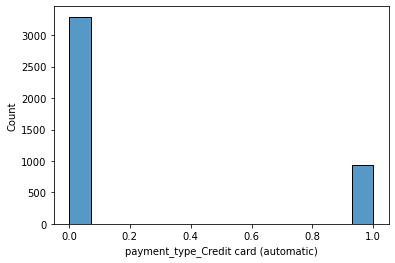

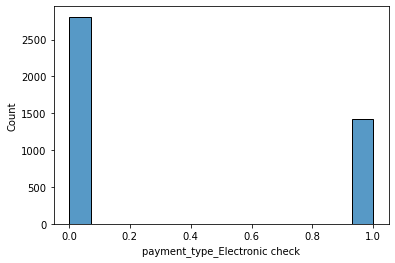

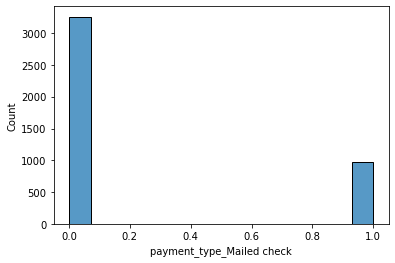

In [35]:
for col in tel_bool:
    sns.histplot(data = train, x = col)
    plt.show()

In [42]:
train['churn'] = train.churn.map({'Yes': 1, 'No': 0})

In [44]:
train.churn.value_counts()

0    3112
1    1113
Name: churn, dtype: int64

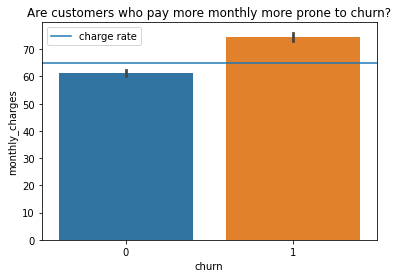

In [47]:
plt.title("Are customers who pay more monthly more prone to churn?")
sns.barplot(y='monthly_charges', x='churn', data=train)
charge_rate = train.monthly_charges.mean()
plt.axhline(charge_rate, label='charge rate')
plt.legend()
plt.show()

In [48]:
def tel_vis(train, col):
    plt.title('Relationship of churn rate and '+col)
    sns.barplot(x='churn', y=col, data=train)
    plt.legend()
    plt.show()
    
    
def tel_test(train, col):
    alpha = 0.05
    null_hyp = col+' and chrun rate are independent'
    alt_hyp = 'There is a relationship between churn rate and '+col
    observed = pd.crosstab(train.churn, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between churn rate and '+col)

def tel_analysis(train, col):
    tel_vis(train, col)
    tel_test(train, col)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


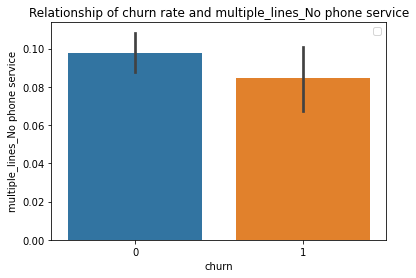

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


We fail to reject the null hypothesis that multiple_lines_No phone service and chrun rate are independent
There appears to be no relationship between churn rate and multiple_lines_No phone service


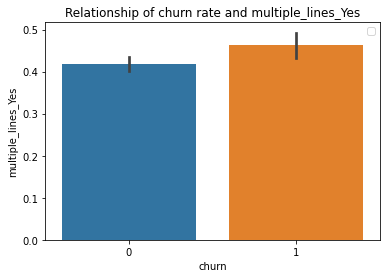

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


We reject the null hypothesis that multiple_lines_Yes and chrun rate are independent
There is a relationship between churn rate and multiple_lines_Yes


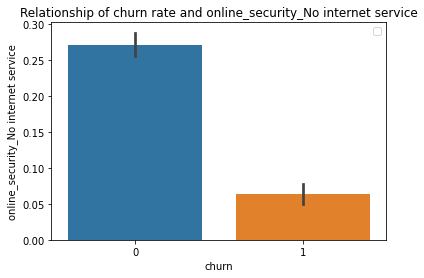

We reject the null hypothesis that online_security_No internet service and chrun rate are independent
There is a relationship between churn rate and online_security_No internet service


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


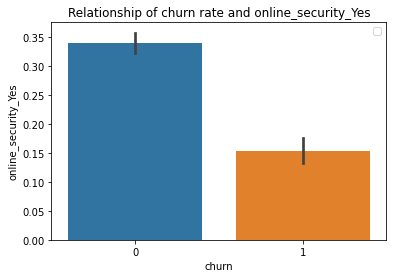

We reject the null hypothesis that online_security_Yes and chrun rate are independent
There is a relationship between churn rate and online_security_Yes


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


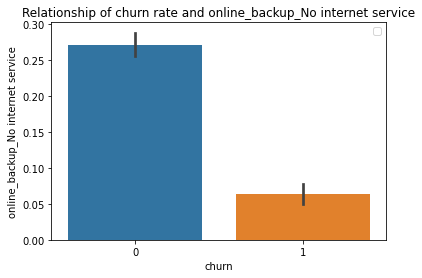

We reject the null hypothesis that online_backup_No internet service and chrun rate are independent
There is a relationship between churn rate and online_backup_No internet service


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


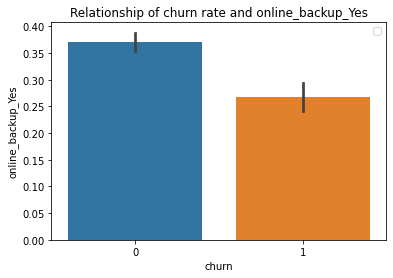

We reject the null hypothesis that online_backup_Yes and chrun rate are independent
There is a relationship between churn rate and online_backup_Yes


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


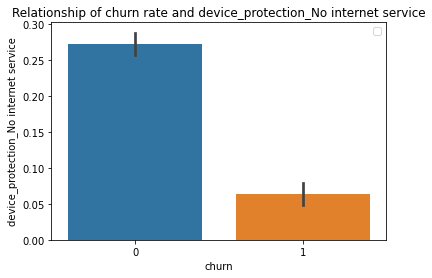

We reject the null hypothesis that device_protection_No internet service and chrun rate are independent
There is a relationship between churn rate and device_protection_No internet service


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


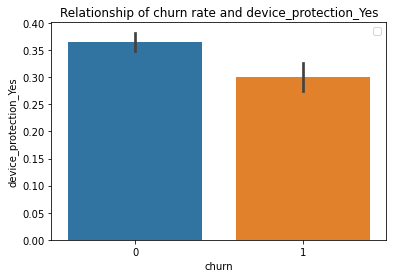

We reject the null hypothesis that device_protection_Yes and chrun rate are independent
There is a relationship between churn rate and device_protection_Yes


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


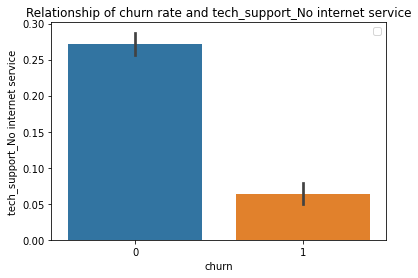

We reject the null hypothesis that tech_support_No internet service and chrun rate are independent
There is a relationship between churn rate and tech_support_No internet service


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


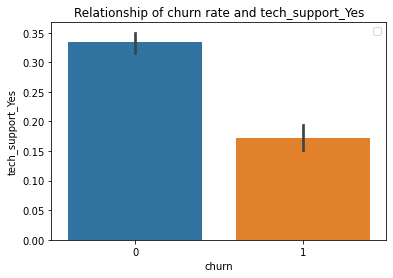

We reject the null hypothesis that tech_support_Yes and chrun rate are independent
There is a relationship between churn rate and tech_support_Yes


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


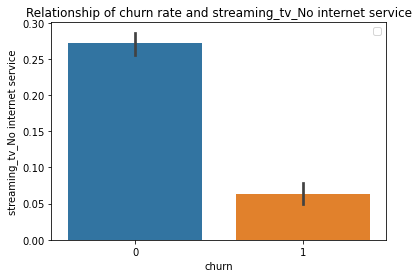

We reject the null hypothesis that streaming_tv_No internet service and chrun rate are independent
There is a relationship between churn rate and streaming_tv_No internet service


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


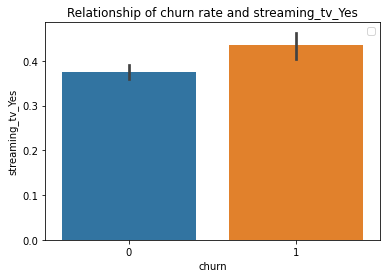

We reject the null hypothesis that streaming_tv_Yes and chrun rate are independent
There is a relationship between churn rate and streaming_tv_Yes


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


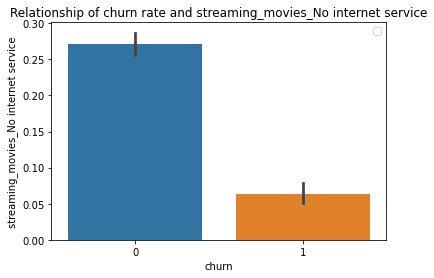

We reject the null hypothesis that streaming_movies_No internet service and chrun rate are independent
There is a relationship between churn rate and streaming_movies_No internet service


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


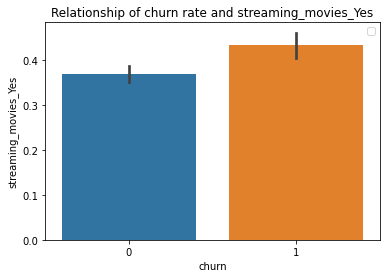

We reject the null hypothesis that streaming_movies_Yes and chrun rate are independent
There is a relationship between churn rate and streaming_movies_Yes


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


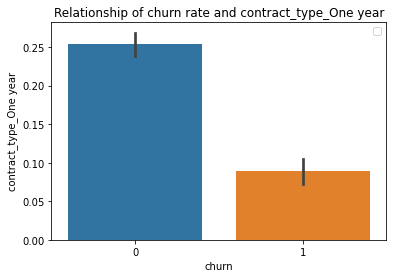

We reject the null hypothesis that contract_type_One year and chrun rate are independent
There is a relationship between churn rate and contract_type_One year


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


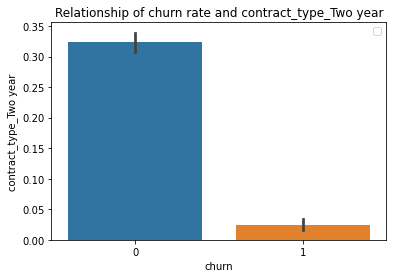

We reject the null hypothesis that contract_type_Two year and chrun rate are independent
There is a relationship between churn rate and contract_type_Two year


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


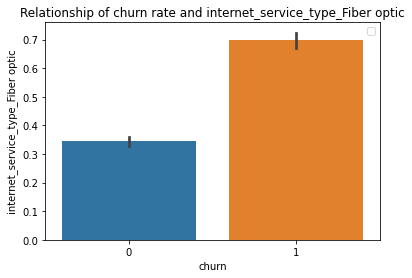

We reject the null hypothesis that internet_service_type_Fiber optic and chrun rate are independent
There is a relationship between churn rate and internet_service_type_Fiber optic


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


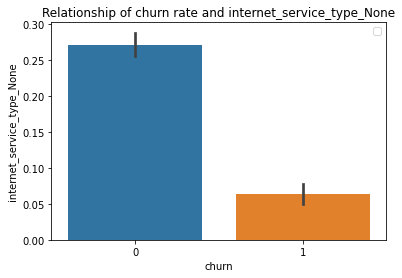

We reject the null hypothesis that internet_service_type_None and chrun rate are independent
There is a relationship between churn rate and internet_service_type_None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


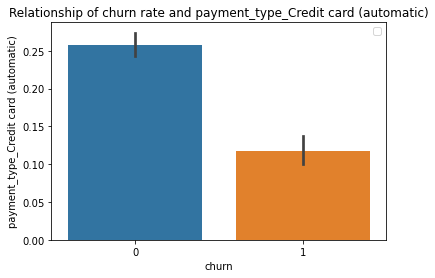

We reject the null hypothesis that payment_type_Credit card (automatic) and chrun rate are independent
There is a relationship between churn rate and payment_type_Credit card (automatic)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


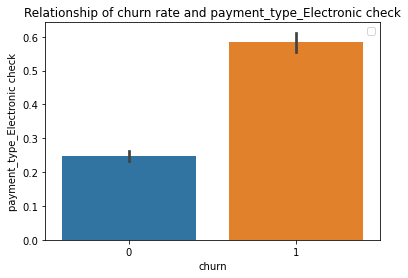

We reject the null hypothesis that payment_type_Electronic check and chrun rate are independent
There is a relationship between churn rate and payment_type_Electronic check


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


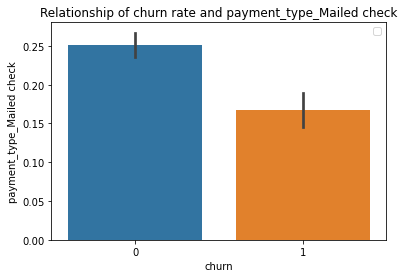

We reject the null hypothesis that payment_type_Mailed check and chrun rate are independent
There is a relationship between churn rate and payment_type_Mailed check


In [49]:
for col in tel_bool:
    tel_analysis(train, col)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


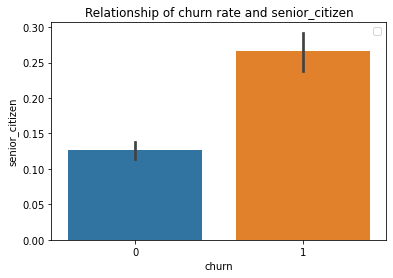

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


We reject the null hypothesis that senior_citizen and chrun rate are independent
There is a relationship between churn rate and senior_citizen


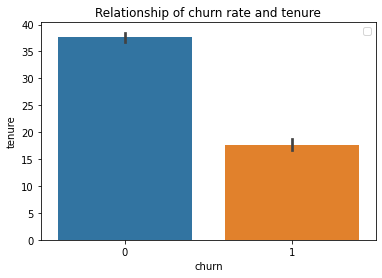

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


We reject the null hypothesis that tenure and chrun rate are independent
There is a relationship between churn rate and tenure


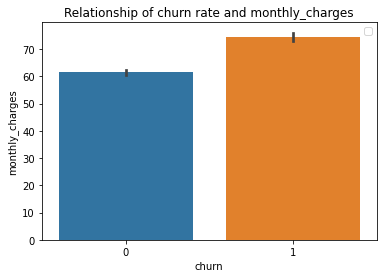

We reject the null hypothesis that monthly_charges and chrun rate are independent
There is a relationship between churn rate and monthly_charges


In [50]:
for col in tel_vars:
    tel_analysis(train, col)